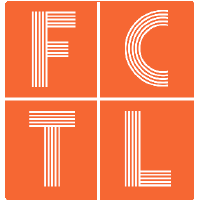

You can refer to [this](https://www.kaggle.com/fedesoriano/heart-failure-prediction?fbclid=IwAR2h0br-991xvOZsxTnG82tAQSHWD1Hqwmx9AUeJuoXBxiDA8xPfpFEBXOo) link for more info 

In [1]:
# basic libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('D:\Machine Data\Heart Prediction\heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 1. Exploratory Data Analysis (EDA)

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df['FastingBS'] = df['FastingBS'].astype('object')
df['HeartDisease'] = df['HeartDisease'].astype('object')

In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##### No NULL values as shown

In [8]:
cols = df.columns
cols

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
categorical_cols = []
numerical_cols = []
target = 'HeartDisease'

for col in cols:
    if(df[col].dtype == 'object'):
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [10]:
categorical_cols = categorical_cols[:-1]
categorical_cols

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [11]:
numerical_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


##### it's obvious the different descriptive statistical metrics for different columns; so Standarization is required in preprocessing phase

### Numerical Columns Visualization

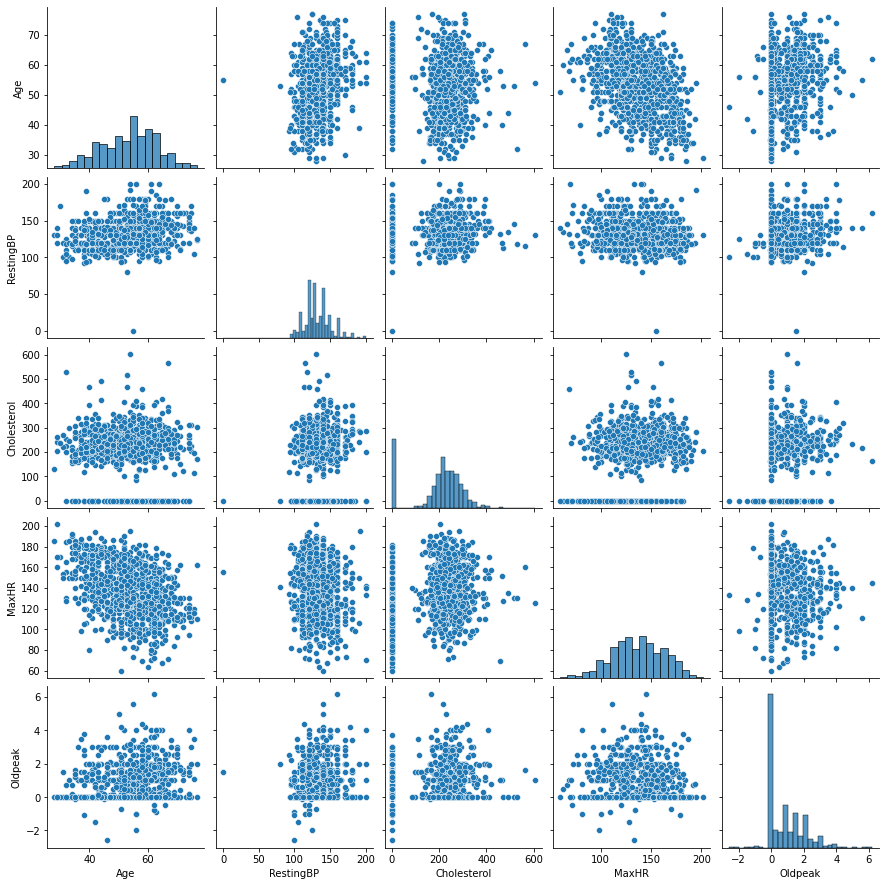

In [13]:
sns.pairplot(df[numerical_cols])

<AxesSubplot:>

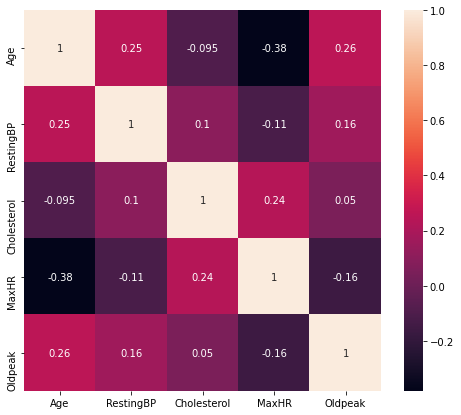

In [14]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

sns.heatmap(df[numerical_cols].corr(), annot=True, ax=ax)

There is a weak corelation between the numcerical features as shown in the figure above, so put in mind that regularization is required to eliminate any multicolinearity.

### Catergorical Columns Visualization (Value Counts for each column)

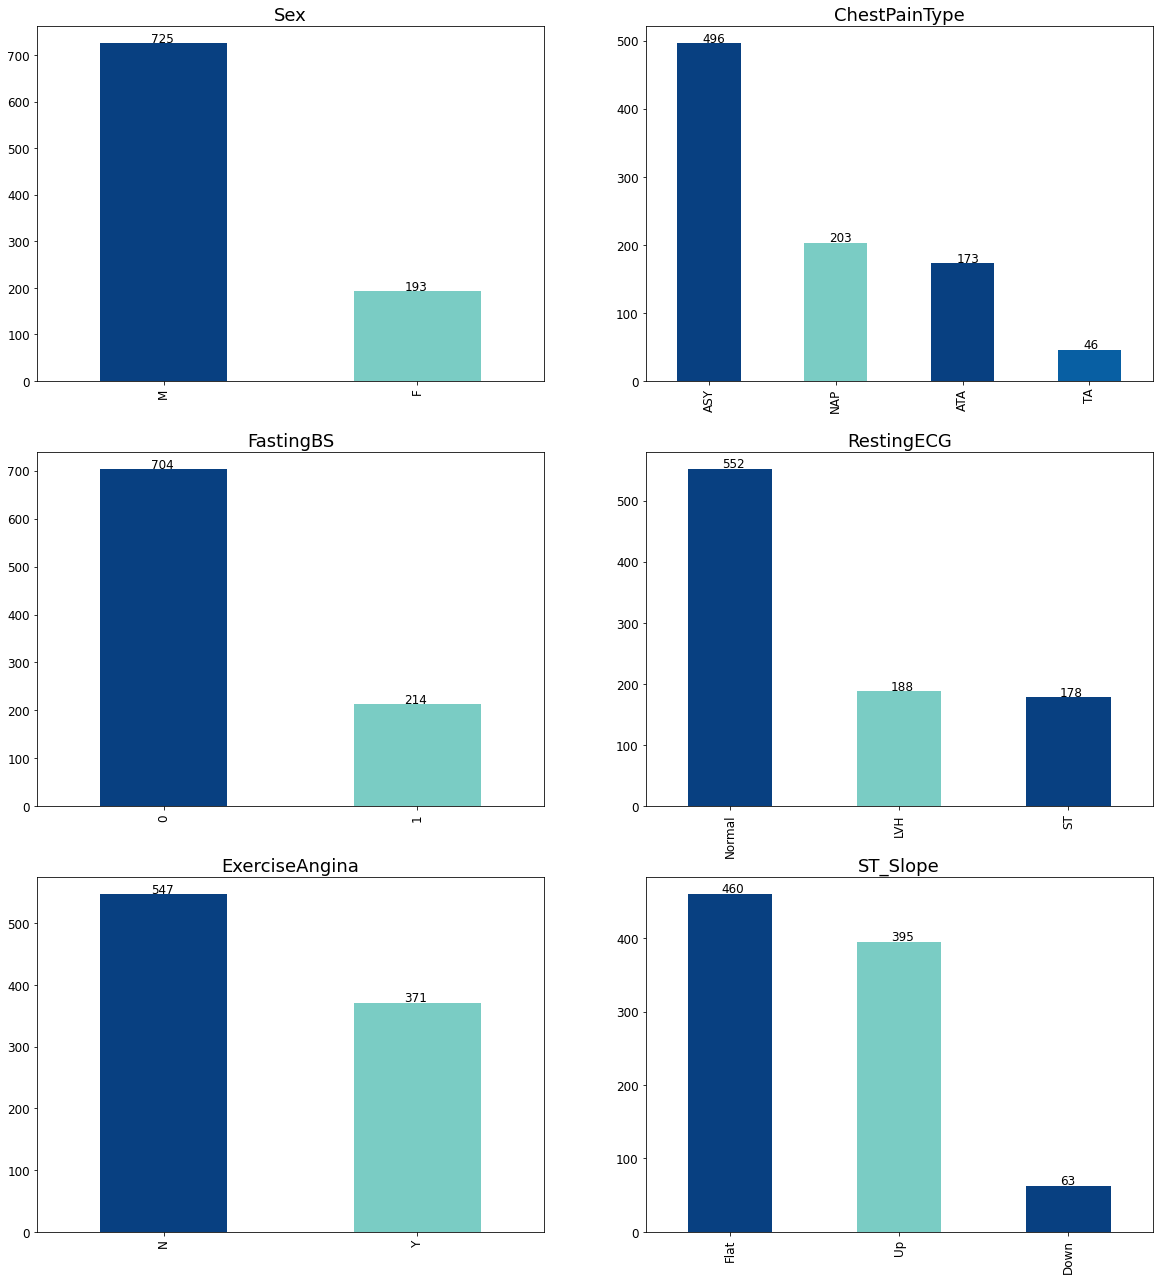

In [15]:
fig = plt.figure(figsize=(20,30))

data_color = [1000,500,1000,900]
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)

for i, col in enumerate(categorical_cols):
    ax = fig.add_subplot(4,2,i+1)
    ax.set_title(col, fontsize=18)
    df[col].value_counts().plot(kind='bar',color=colors, fontsize=12)
    xlocs, xlabs = plt.xticks()
    for i, v in enumerate(df[col].value_counts()):
        ax.text(xlocs[i] - 0.05, v + 2, str(v), fontsize=12)

Target Variable

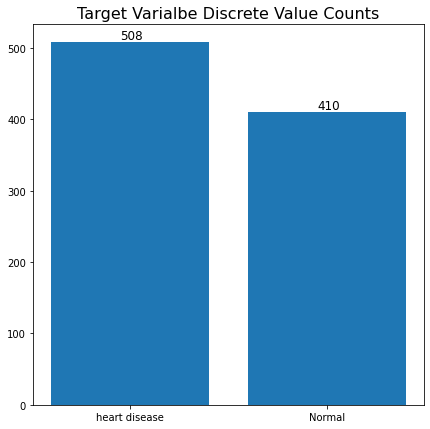

In [16]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111)
ax.set_title("Target Variable Discrete Value Counts", fontsize=16)
ax.bar(['heart disease','Normal'],df[target].value_counts())
xlocs, xlabs = plt.xticks()
for i, v in enumerate(df[target].value_counts()):
    ax.text(xlocs[i] - 0.05, v + 5, str(v), fontsize=12)

##### we can see that the classes for this dataset are balanced!

# 2. Preprocessing

### Categorical Features

Splitting the categorical cols depending in the number of unique values they have such that:
* if (unique_values == 2) use `LabelEncoder`
* if (unique_values > 2) use `OneHotEncoder (OHE) or pd.get_dummies() function`

In [17]:
binary_cols = []
non_binary_cols = []

for col in categorical_cols:
    if(len(df[col].value_counts()) == 2):
        binary_cols.append(col)
    else:
        non_binary_cols.append(col)

In [18]:
binary_cols

['Sex', 'FastingBS', 'ExerciseAngina']

In [19]:
non_binary_cols

['ChestPainType', 'RestingECG', 'ST_Slope']

In [20]:
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
for col in non_binary_cols:
    curr_df = pd.get_dummies(df[col])
    df = df.join(curr_df)
    df.drop(columns=[col], axis=1, inplace=True)

In [22]:
df[binary_cols].sample(10)

,Sex,FastingBS,ExerciseAngina
163,1,0,0
304,1,1,0
354,1,0,0
812,0,0,0
815,1,0,0
321,1,1,0
793,1,1,0
644,0,1,0
416,1,0,1
108,1,0,0


In [23]:
curr_cols = []
for col in df.columns:
    if(col not in numerical_cols and col not in binary_cols):
        curr_cols.append(col)
        
curr_cols

['HeartDisease',
 'ASY',
 'ATA',
 'NAP',
 'TA',
 'LVH',
 'Normal',
 'ST',
 'Down',
 'Flat',
 'Up']

In [24]:
df[curr_cols].sample(10)

,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
502,1,1,0,0,0,0,0,1,0,1,0
748,1,1,0,0,0,1,0,0,1,0,0
638,0,1,0,0,0,0,1,0,0,0,1
600,0,1,0,0,0,0,0,1,0,1,0
160,1,1,0,0,0,1,0,0,0,1,0
444,1,1,0,0,0,0,1,0,0,1,0
232,0,0,1,0,0,0,1,0,0,0,1
727,1,1,0,0,0,1,0,0,0,0,1
332,0,0,0,1,0,0,1,0,0,0,1
610,1,1,0,0,0,0,0,1,0,1,0


In [25]:
df.shape

(918, 19)

##### Now we have all our categorical features processed

### Numerical Features

In [26]:
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [27]:
df[numerical_cols]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432
...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.188999,0.293283
914,1.536902,0.627078,-0.053049,0.164684,2.357094
915,0.370100,-0.129513,-0.620168,-0.857069,0.293283
916,0.370100,-0.129513,0.340275,1.461525,-0.832432


In [28]:
df[numerical_cols].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,9.180000e+02
mean,-1.083616e-16,1.954380e-16,0.000000,4.953675e-16,1.238419e-16
std,1.000545e+00,1.000545e+00,1.000545,1.000545e+00,1.000545e+00
min,-2.706015e+00,-7.154995e+00,-1.818435,-3.018469e+00,-3.271482e+00
25%,-6.906294e-01,-6.699346e-01,-0.233704,-6.605778e-01,-8.324324e-01
50%,5.188098e-02,-1.295128e-01,0.221363,4.678968e-02,-2.695748e-01
75%,6.883185e-01,4.109089e-01,0.623835,7.541571e-01,5.747115e-01
max,2.491558e+00,3.653439e+00,3.697252,2.561874e+00,4.983762e+00


##### Now we also have our numerical features standarized and processed

In [29]:
df.sample(15)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
480,0.476173,1,-0.345682,-1.818435,1,-1.053560,1,1.043759,1,0,1,0,0,0,1,0,0,1,0
344,-0.266338,1,-0.669935,-1.818435,1,-1.289349,0,-0.832432,1,1,0,0,0,0,1,0,0,1,0
519,1.006537,1,-1.966947,0.971423,0,-0.621280,1,0.105664,1,1,0,0,0,0,0,1,0,0,1
280,0.688318,1,-0.669935,0.431746,0,-0.071105,0,-0.832432,0,0,0,1,0,1,0,0,0,0,1
461,1.006537,1,0.194740,-1.818435,0,-2.075313,1,-0.832432,1,1,0,0,0,0,1,0,0,1,0
48,-1.857431,1,-1.102272,1.291571,0,1.854507,0,0.105664,0,0,0,1,0,0,1,0,0,1,0
168,0.476173,1,0.140698,0.212216,0,-1.446542,0,-0.832432,0,1,0,0,0,0,1,0,0,0,1
358,-1.645286,1,-0.940145,-1.818435,0,-0.346192,1,-0.832432,1,0,0,1,0,0,1,0,0,1,0
517,1.218683,1,0.951331,0.331128,0,-0.660578,1,0.574711,1,1,0,0,0,0,1,0,0,1,0
653,-1.220994,1,-0.129513,-0.171961,0,0.518368,0,-0.832432,0,0,0,1,0,0,1,0,0,0,1


In [30]:
df['HeartDisease'] = df['HeartDisease'].astype('int64')

### Splitting our data

In [31]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=y)

# 3. Building Model & Model Evaluation

### Logistic Regression

In [32]:
c_vals = [0.01, 0.1, 1, 10, 100]

cms = []
accuracies = []

for c in c_vals:
    lr = LogisticRegression(penalty='l2', solver='liblinear', C=c)
    lr.fit(X_train, y_train)
    y_predicted = lr.predict(X_test)
    
    cms.append(confusion_matrix(y_test, y_predicted))
    accuracies.append(accuracy_score(y_test, y_predicted))

In [33]:
def plot_cms(cms, c_values, figsize, hyperparameter, shape):
    fig = plt.figure(figsize=figsize)
    pos = shape * 10 + 1
    i = 0
    
    for cm in cms:
        ax = fig.add_subplot(pos)
        sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12})
        ax.set_title(f'When {hyperparameter} = {c_values[i]}')
        pos += 1
        i += 1

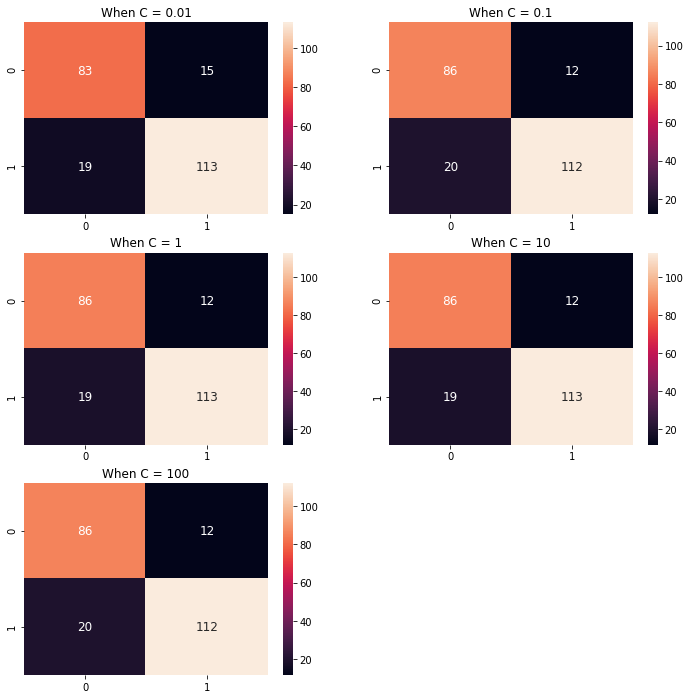

In [34]:
plot_cms(cms, c_vals,(12,12), "C", 32)

In [35]:
def plot_accuracies(accs, c_values, figsize, xlabel, ylabel,title):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    sns.barplot(x=c_values,y=accs,ax=ax)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title, fontsize=18)

    xlocs, xlabs = plt.xticks()
    for i, v in enumerate(accs):
        ax.text(xlocs[i] - 0.2, v + 0.005, "{:.3f}".format(v), fontsize=12)

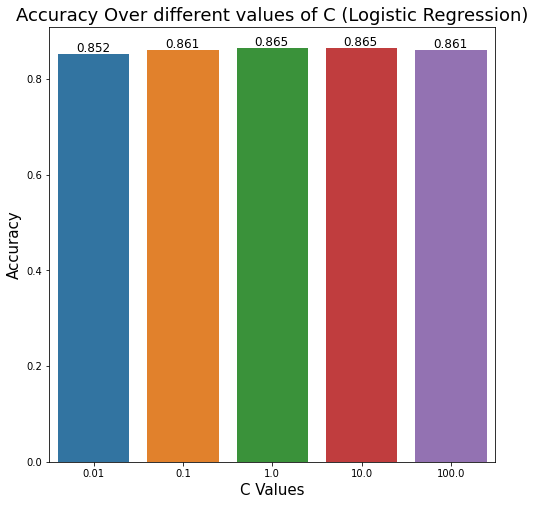

In [36]:
plot_accuracies(accuracies, c_vals, (8,8), 'C Values', 'Accuracy','Accuracy Over different values of C (Logistic Regression)')

### KNN

Here we are using KNN algorithm, but first we are going to find the optimal value of neighbors that proivedes the highest accuracy metric.

In [37]:
error_rate = []

# Will take some time
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

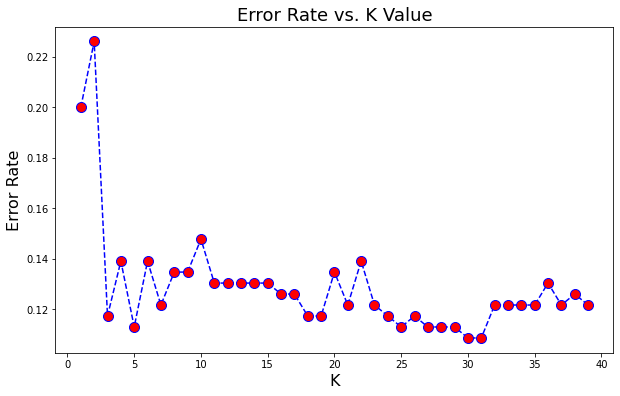

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize=18)
plt.xlabel('K', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)

We observe that for `25 < K < 30` the error rate is lower than other values of K.

In [39]:
K = 25
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)

<AxesSubplot:>

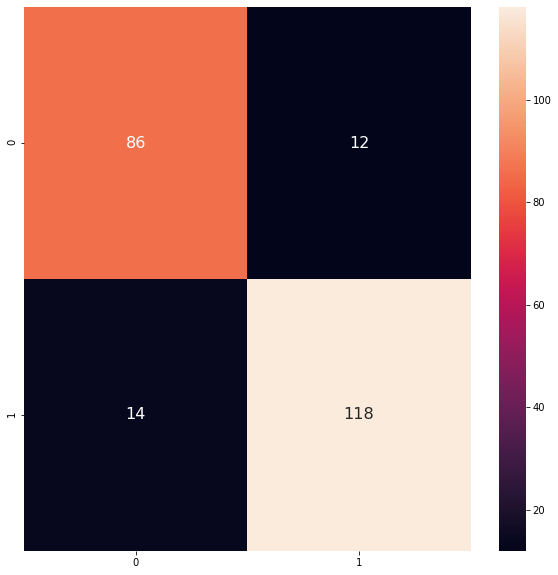

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='d', annot_kws={"size": 16})

In [41]:
print('Accuracy score for KNN when K = {} is {}'.format(K, accuracy_score(y_test, y_predicted)))

Accuracy score for KNN when K = 25 is 0.8869565217391304


### SVM

In [42]:
c_vals = [0.01, 0.1, 1, 10, 100]

cms = []
accuracies = []

for c in c_vals:
    svc = LinearSVC(penalty='l2', loss='hinge', C=c)
    svc.fit(X_train, y_train)
    y_predicted = svc.predict(X_test)
    
    cms.append(confusion_matrix(y_test, y_predicted))
    accuracies.append(accuracy_score(y_test, y_predicted))

c:\users\maysa\pycharmprojects\data analysis with python\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\maysa\pycharmprojects\data analysis with python\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\maysa\pycharmprojects\data analysis with python\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


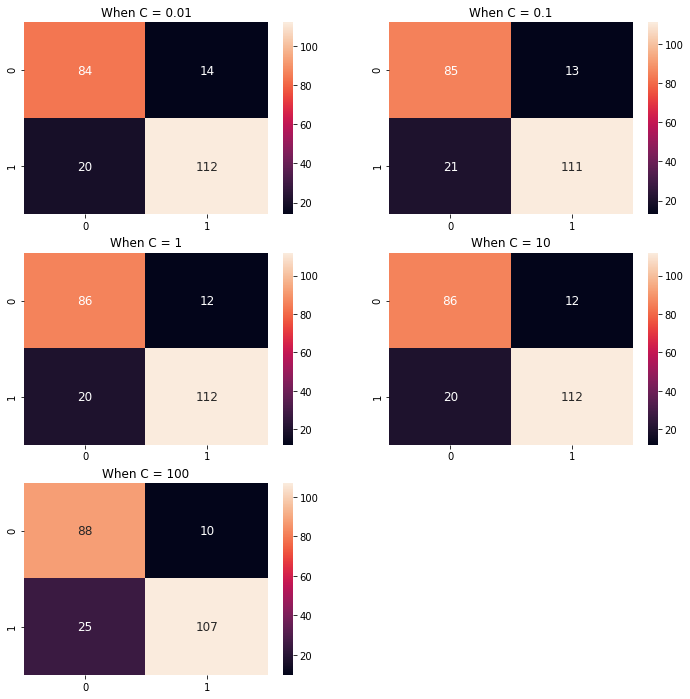

In [43]:
plot_cms(cms, c_vals, (12,12),'C', 32)

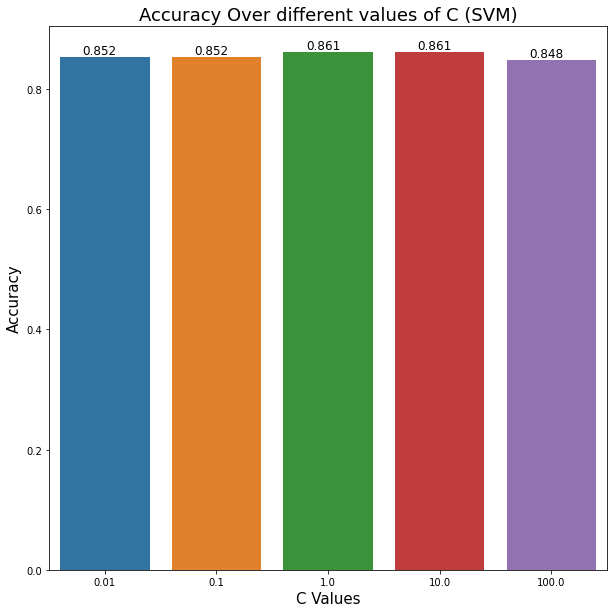

In [44]:
plot_accuracies(accuracies, c_vals, (10,10),'C Values', 'Accuracy', 'Accuracy Over different values of C (SVM)')

### Random Forest

In [45]:
estimators = np.arange(0,500,50)[1:]
estimators

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])

In [46]:
cms = []
accuracies = []

for n in estimators:
    forest = RandomForestClassifier(n_estimators=n, criterion='gini', bootstrap=True)
    forest.fit(X_train, y_train)
    y_predicted = forest.predict(X_test)
    
    cms.append(confusion_matrix(y_test, y_predicted))
    accuracies.append(accuracy_score(y_test, y_predicted))

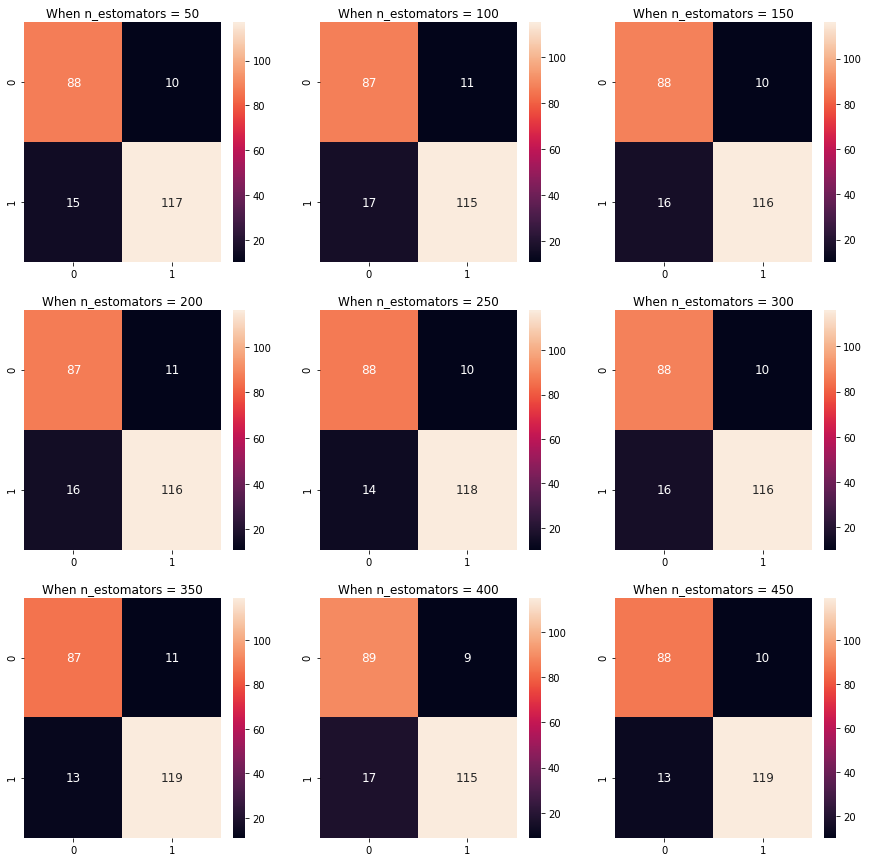

In [47]:
plot_cms(cms, estimators, (15,15),'n_estomators', 33)

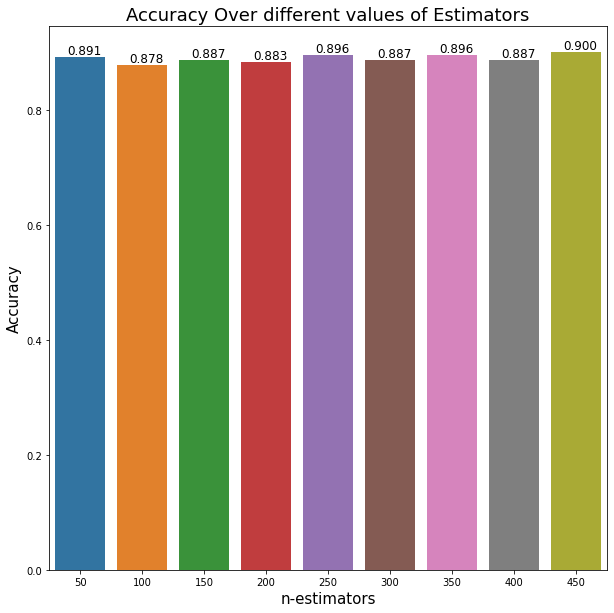

In [48]:
plot_accuracies(accuracies, estimators, (10,10),'n-estimators','Accuracy','Accuracy Over different values of Estimators')

## Coded By:
#### 1. Maysam Mousa
#### 2. Ashraf Habromman
#### 3. Haya Mikkawi

# End of Notebook